In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Birth Rate Data

In [207]:
BIRTH = pd.read_csv("/Users/jo/Desktop/Birth_Rate_data/Crude_Birth_Rate.csv")
BIRTH

,DATE,SPDYNCBRTINUSA
0,1960-01-01,23.7
1,1961-01-01,23.3
2,1962-01-01,22.4
3,1963-01-01,21.7
4,1964-01-01,21.1
...,...,...
57,2017-01-01,11.8
58,2018-01-01,11.6
59,2019-01-01,11.4
60,2020-01-01,10.9


In [208]:
BIRTH['DATE'] = pd.to_datetime(BIRTH['DATE']).dt.year
BIRTH

,DATE,SPDYNCBRTINUSA
0,1960,23.7
1,1961,23.3
2,1962,22.4
3,1963,21.7
4,1964,21.1
...,...,...
57,2017,11.8
58,2018,11.6
59,2019,11.4
60,2020,10.9


In [209]:
BIRTH = BIRTH.rename(columns = {"SPDYNCBRTINUSA" : "Birth Rate (Per 1,000 People)"})
BIRTH = BIRTH.rename(columns = {"DATE" : "Year"})
BIRTH

,Year,"Birth Rate (Per 1,000 People)"
0,1960,23.7
1,1961,23.3
2,1962,22.4
3,1963,21.7
4,1964,21.1
...,...,...
57,2017,11.8
58,2018,11.6
59,2019,11.4
60,2020,10.9


In [210]:
BIRTH.isnull().sum()

Year                             0
Birth Rate (Per 1,000 People)    0
dtype: int64

### US GDP DATA

In [211]:
GDP = pd.read_csv("/Users/jo/Desktop/Inflation_data/GDP.csv")
GDP

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,ABW,314.0,Aruba,Rate,GDP deflator Index growth rate,6.5,-5.1,-2.3,25.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Rate,GDP deflator Index growth rate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Rate,GDP deflator Index growth rate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Rate,GDP deflator Index growth rate,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,NaN,Andorra,Rate,GDP deflator Index growth rate,NaN,7.8,8.5,11.8,15.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,ZAF,199.0,South Africa,Rate,GDP deflator Index growth rate,4.3,6.0,11.1,18.4,15.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,ZMB,754.0,Zambia,Rate,GDP deflator Index growth rate,2.6,6.0,5.1,6.5,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,ZWE,698.0,Zimbabwe,Rate,GDP deflator Index growth rate,-12.1,6.2,13.5,20.5,12.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
US_GDP = GDP.loc[GDP['Country'] == 'United States']
US_GDP

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82
184,USA,111.0,United States,Rate,GDP deflator Index growth rate,5.3,5.1,4.3,5.5,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
DROP_US_GDP_COL = US_GDP.columns[US_GDP.columns.str.startswith("Unnamed")]
US_GDP.drop(columns = DROP_US_GDP_COL, inplace = True)
US_GDP

/var/folders/b_/vsckp1p91px7c2wjv0nqgwc00000gn/T/ipykernel_38452/1834984249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_GDP.drop(columns = DROP_US_GDP_COL, inplace = True)


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
184,USA,111.0,United States,Rate,GDP deflator Index growth rate,5.3,5.1,4.3,5.5,9.0,...,1.9,1.0,1.0,1.9,2.4,1.8,1.2,4.5,6.5,3.7


### US PPI DATA

In [214]:
PPI = pd.read_csv("/Users/jo/Desktop/Inflation_data/PPI.csv")
PPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2018,2019,2020,2021,2022,2023,Note,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,AGO,614.0,Angola,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,16.1,17.6,23.1,29.8,26.0,18.2,"Producer Price Index, All Commodities",NaN,NaN,NaN
1,ALB,914.0,Albania,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.6,-0.8,-3.4,2.7,19.9,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN
2,ARG,213.0,Argentina,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,52.2,58.3,42.5,59.1,60.3,128.5,"Producer Price Index, All Commodities",NaN,NaN,NaN
3,ARM,911.0,Armenia,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.1,0.6,3.0,9.9,2.7,1.6,"Producer Price Index, All Commodities",NaN,NaN,NaN
4,AUS,193.0,Australia,Inflation,Producer Price Inflation,4.4,4.9,4.8,8.6,15.3,...,5.2,1.0,-3.7,5.7,9.9,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,XKX,967.0,Kosovo,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.4,0.9,-0.6,4.9,9.3,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN
111,ZAF,199.0,South Africa,Inflation,Producer Price Inflation,NaN,5.0,6.3,12.4,18.6,...,5.5,4.6,2.5,7.1,14.4,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN
112,ZMB,754.0,Zambia,Inflation,Producer Price Inflation,14.3,0.0,4.2,12.0,10.7,...,NaN,NaN,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
US_PPI = PPI.loc[PPI['Country'] == 'United States']
US_PPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2018,2019,2020,2021,2022,2023,Note,Unnamed: 60,Unnamed: 61,Unnamed: 62
106,USA,111.0,United States,Inflation,Producer Price Inflation,3.6,3.3,4.4,13.1,18.8,...,2.9,1.7,-2.1,9.0,8.1,2.7,"Producer Price Index, All Commodities",NaN,NaN,NaN


In [216]:
DROP_US_PPI_COL = US_PPI.columns[US_PPI.columns.str.startswith("Unnamed")]
US_PPI.drop(columns = DROP_US_PPI_COL, inplace = True)
US_PPI

/var/folders/b_/vsckp1p91px7c2wjv0nqgwc00000gn/T/ipykernel_38452/599513673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_PPI.drop(columns = DROP_US_PPI_COL, inplace = True)


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Note
106,USA,111.0,United States,Inflation,Producer Price Inflation,3.6,3.3,4.4,13.1,18.8,...,-0.9,0.4,2.3,2.9,1.7,-2.1,9.0,8.1,2.7,"Producer Price Index, All Commodities"


In [217]:
US_PPI.isnull().sum()

Country Code        0
IMF Country Code    0
Country             0
Indicator Type      0
Series Name         0
1970                0
1971                0
1972                0
1973                0
1974                0
1975                0
1976                0
1977                0
1978                0
1979                0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010      

### US CCPI DATA

In [218]:
CCPI = pd.read_csv("/Users/jo/Desktop/Inflation_data/CCPI.csv")
CCPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166
0,AFG,512.0,Afghanistan,Inflation,Official Core Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,914.0,Albania,Inflation,Official Core Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,193.0,Australia,Inflation,Official Core Consumer Price Inflation,5.0,-10.9,6.5,8.3,15.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AUT,122.0,Austria,Inflation,Official Core Consumer Price Inflation,3.7,5.2,6.4,7.4,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARM,911.0,Armenia,Inflation,Official Core Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,VNM,582.0,Vietnam,Inflation,Official Core Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,XKX,967.0,Kosovo,Inflation,Official Core Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,ZAF,199.0,South Africa,Inflation,Official Core Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
US_CCPI = CCPI.loc[CCPI['Country'] == 'United States']
US_CCPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166
108,USA,111.0,United States,Inflation,Official Core Consumer Price Inflation,6.2,4.7,3.1,3.5,8.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
DROP_US_CCPI_COL = US_CCPI.columns[US_CCPI.columns.str.startswith("Unnamed")]
US_CCPI.drop(columns = DROP_US_CCPI_COL, inplace = True)
US_CCPI

/var/folders/b_/vsckp1p91px7c2wjv0nqgwc00000gn/T/ipykernel_38452/3553587323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_CCPI.drop(columns = DROP_US_CCPI_COL, inplace = True)


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Note
108,USA,111.0,United States,Inflation,Official Core Consumer Price Inflation,6.2,4.7,3.1,3.5,8.2,...,1.8,2.2,1.8,2.1,2.2,1.7,3.6,6.2,4.8,All Items Excluding Food and Energy


In [221]:
US_CCPI.isnull().sum()

Country Code        0
IMF Country Code    0
Country             0
Indicator Type      0
Series Name         0
1970                0
1971                0
1972                0
1973                0
1974                0
1975                0
1976                0
1977                0
1978                0
1979                0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010      

### US FCPI DATA

In [222]:
FCPI = pd.read_csv("/Users/jo/Desktop/Inflation_data/FCPI.csv")
FCPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Note
0,ABW,314.0,Aruba,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,2.2,-0.2,0.7,7.4,12.8,11.0,NaN,NaN,NaN,Food and non-acoholic beverage
1,AFG,512.0,Afghanistan,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.8,5.7,6.9,-1.0,3.8,5.8,NaN,NaN,NaN,Food and non-acoholic beverage
2,AGO,614.0,Angola,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,9.3,21.2,41.0,22.4,17.7,25.2,23.9,22.9,13.3,"Food, Beverages and Tobacco"
3,ALB,914.0,Albania,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.3,3.2,3.9,2.7,2.9,3.6,3.9,11.2,NaN,Food and non-acoholic beverage
4,ARE,466.0,United Arab Emirates,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.2,1.0,1.2,3.5,-1.4,3.7,0.0,6.9,NaN,Food and non-acoholic beverage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,ZAF,199.0,South Africa,Inflation,Food Consumer Price Inflation,3.9,5.4,6.9,16.1,14.8,...,5.1,10.5,6.9,3.6,3.6,4.4,6.1,9.3,10.8,Food and non-acoholic beverage
180,ZMB,754.0,Zambia,Inflation,Food Consumer Price Inflation,6.6,6.6,9.2,7.4,12.1,...,11.1,21.3,5.8,7.1,10.4,16.2,27.7,12.8,12.4,Food and non-acoholic beverage
181,ZWE,698.0,Zimbabwe,Inflation,Food Consumer Price Inflation,3.2,2.5,5.0,3.4,10.7,...,-3.3,-3.3,2.5,14.6,86.1,601.0,105.8,150.0,NaN,Food and non-acoholic beverage
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
US_FCPI = FCPI.loc[FCPI['Country'] == 'United States']
US_FCPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Note
169,USA,111.0,United States,Inflation,Food Consumer Price Inflation,5.4,3.1,4.1,13.3,13.8,...,1.8,0.3,0.9,1.4,0.9,3.5,3.5,11.4,4.9,Food and non-acoholic beverage


In [224]:
US_FCPI.isnull().sum()

Country Code        0
IMF Country Code    0
Country             0
Indicator Type      0
Series Name         0
1970                0
1971                0
1972                0
1973                0
1974                0
1975                0
1976                0
1977                0
1978                0
1979                0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010      

### US ECPI DATA

In [225]:
ECPI = pd.read_csv("/Users/jo/Desktop/Inflation_data/ECPI.csv")
ECPI


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,2023,Note,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.2,-1.3,1.3,5.4,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,914.0,Albania,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.7,1.4,2.7,14.2,-5.1,NaN,NaN,NaN,NaN,NaN
3,ARE,466.0,United Arab Emirates,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-5.2,-3.7,-3.6,-0.3,NaN,NaN,NaN,NaN,NaN,NaN
4,ARG,213.0,Argentina,Inflation,Energy Consumer Price Inflation,NaN,25.9,6.7,39.9,9.4,...,49.3,19.9,26.2,51.4,110.9,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,ZWE,698.0,Zimbabwe,Inflation,Energy Consumer Price Inflation,1.1,-0.4,-0.6,-0.7,0.3,...,90.8,306.4,69.8,97.2,115.4,NaN,NaN,NaN,NaN,NaN
170,VGB,284.0,British Virgin Islands,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.1,-1.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NCL,687.0,New Caledonia,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.3,-5.1,4.8,16.7,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
US_ECPI = ECPI.loc[ECPI['Country'] == 'United States']
US_ECPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,2023,Note,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
160,USA,111.0,United States,Inflation,Energy Consumer Price Inflation,12.8,12.8,12.8,12.8,12.8,...,21.3,2.6,21.0,25.5,-4.5,NaN,NaN,NaN,NaN,NaN


In [227]:
DROP_US_ECPI_COL = US_ECPI.columns[US_ECPI.columns.str.startswith("Unnamed")]
US_ECPI.drop(columns = DROP_US_ECPI_COL, inplace = True)
US_ECPI

/var/folders/b_/vsckp1p91px7c2wjv0nqgwc00000gn/T/ipykernel_38452/2510981067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_ECPI.drop(columns = DROP_US_ECPI_COL, inplace = True)


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Note
160,USA,111.0,United States,Inflation,Energy Consumer Price Inflation,12.8,12.8,12.8,12.8,12.8,...,2.3,16.9,7.1,25.6,21.3,2.6,21.0,25.5,-4.5,NaN


In [228]:
US_ECPI.isnull().sum()

Country Code        0
IMF Country Code    0
Country             0
Indicator Type      0
Series Name         0
1970                0
1971                0
1972                0
1973                0
1974                0
1975                0
1976                0
1977                0
1978                0
1979                0
1980                0
1981                0
1982                0
1983                0
1984                0
1985                0
1986                0
1987                0
1988                0
1989                0
1990                0
1991                0
1992                0
1993                0
1994                0
1995                0
1996                0
1997                0
1998                0
1999                0
2000                0
2001                0
2002                0
2003                0
2004                0
2005                0
2006                0
2007                0
2008                0
2009                0
2010      

### US HCPI DATA

In [229]:
HCPI = pd.read_csv("/Users/jo/Desktop/Inflation_data/HCPI.csv")
HCPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215
0,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.5,25.5,-12.5,-10.7,10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,612.0,Algeria,Inflation,Headline Consumer Price Inflation,6.6,2.6,3.7,6.2,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,8.0,5.8,15.8,15.7,27.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ATG,311.0,Antigua and Barbuda,Inflation,Headline Consumer Price Inflation,8.9,8.6,12.7,21.7,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,YEM,474.0,"Yemen, Rep.",Inflation,Headline Consumer Price Inflation,5.0,5.7,4.5,16.4,23.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,ZMB,754.0,Zambia,Inflation,Headline Consumer Price Inflation,2.6,6.0,5.1,6.5,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,ZWE,698.0,Zimbabwe,Inflation,Headline Consumer Price Inflation,2.1,3.0,2.8,3.1,6.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
US_HCPI = HCPI.loc[HCPI['Country'] == 'United States']
US_HCPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215
193,USA,111.0,United States,Inflation,Headline Consumer Price Inflation,5.9,4.3,3.3,6.2,11.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
DROP_US_HCPI_COL = US_HCPI.columns[US_HCPI.columns.str.startswith("Unnamed")]
US_HCPI.drop(columns = DROP_US_HCPI_COL, inplace = True)
US_HCPI

/var/folders/b_/vsckp1p91px7c2wjv0nqgwc00000gn/T/ipykernel_38452/70594786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_HCPI.drop(columns = DROP_US_HCPI_COL, inplace = True)


,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Note
193,USA,111.0,United States,Inflation,Headline Consumer Price Inflation,5.9,4.3,3.3,6.2,11.1,...,0.1,1.3,2.1,2.4,1.8,1.2,4.7,8.0,4.1,Annual average inflation


In [232]:
US_HCPI = US_HCPI.drop(columns = ['Note'])
US_PPI = US_PPI.drop(columns = ['Note'])
US_CCPI = US_CCPI.drop(columns = ['Note'])
US_FCPI = US_FCPI.drop(columns = ['Note'])
US_ECPI = US_ECPI.drop(columns = ['Note'])

In [233]:
US_ECPI

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
160,USA,111.0,United States,Inflation,Energy Consumer Price Inflation,12.8,12.8,12.8,12.8,12.8,...,3.0,2.3,16.9,7.1,25.6,21.3,2.6,21.0,25.5,-4.5


In [234]:
start_year = 1970
end_year = 2021
BIRTH = BIRTH[(BIRTH['Year'] >= start_year) & (BIRTH['Year'] <= end_year)]
BIRTH = BIRTH.reset_index(drop = True)
BIRTH

,Year,"Birth Rate (Per 1,000 People)"
0,1970,18.4
1,1971,17.2
2,1972,15.6
3,1973,14.8
4,1974,14.8
5,1975,14.6
6,1976,14.6
7,1977,15.1
8,1978,15.0
9,1979,15.6


In [235]:
# List of DataFrames
dfs = [US_GDP, US_PPI, US_CCPI, US_FCPI, US_ECPI, US_HCPI]

# Concatenate DataFrames vertically
Inf_DF = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
Inf_DF

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,USA,111.0,United States,Rate,GDP deflator Index growth rate,5.3,5.1,4.3,5.5,9.0,...,1.9,1.0,1.0,1.9,2.4,1.8,1.2,4.5,6.5,3.7
1,USA,111.0,United States,Inflation,Producer Price Inflation,3.6,3.3,4.4,13.1,18.8,...,1.6,-0.9,0.4,2.3,2.9,1.7,-2.1,9.0,8.1,2.7
2,USA,111.0,United States,Inflation,Official Core Consumer Price Inflation,6.2,4.7,3.1,3.5,8.2,...,1.7,1.8,2.2,1.8,2.1,2.2,1.7,3.6,6.2,4.8
3,USA,111.0,United States,Inflation,Food Consumer Price Inflation,5.4,3.1,4.1,13.3,13.8,...,2.3,1.8,0.3,0.9,1.4,0.9,3.5,3.5,11.4,4.9
4,USA,111.0,United States,Inflation,Energy Consumer Price Inflation,12.8,12.8,12.8,12.8,12.8,...,3.0,2.3,16.9,7.1,25.6,21.3,2.6,21.0,25.5,-4.5
5,USA,111.0,United States,Inflation,Headline Consumer Price Inflation,5.9,4.3,3.3,6.2,11.1,...,1.6,0.1,1.3,2.1,2.4,1.8,1.2,4.7,8.0,4.1


In [236]:
drop_columns = ['Country Code', 'IMF Country Code', 'Country', 'Indicator Type']
Inf_DF = Inf_DF.drop(columns = drop_columns)
Inf_DF

,Series Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,GDP deflator Index growth rate,5.3,5.1,4.3,5.5,9.0,9.3,5.5,6.2,7.0,...,1.9,1.0,1.0,1.9,2.4,1.8,1.2,4.5,6.5,3.7
1,Producer Price Inflation,3.6,3.3,4.4,13.1,18.8,9.2,4.6,6.1,7.8,...,1.6,-0.9,0.4,2.3,2.9,1.7,-2.1,9.0,8.1,2.7
2,Official Core Consumer Price Inflation,6.2,4.7,3.1,3.5,8.2,9.2,6.6,6.3,7.3,...,1.7,1.8,2.2,1.8,2.1,2.2,1.7,3.6,6.2,4.8
3,Food Consumer Price Inflation,5.4,3.1,4.1,13.3,13.8,8.4,3.1,6.0,9.8,...,2.3,1.8,0.3,0.9,1.4,0.9,3.5,3.5,11.4,4.9
4,Energy Consumer Price Inflation,12.8,12.8,12.8,12.8,12.8,12.8,12.8,12.8,12.8,...,3.0,2.3,16.9,7.1,25.6,21.3,2.6,21.0,25.5,-4.5
5,Headline Consumer Price Inflation,5.9,4.3,3.3,6.2,11.1,9.1,5.7,6.5,7.6,...,1.6,0.1,1.3,2.1,2.4,1.8,1.2,4.7,8.0,4.1


In [237]:
Inf_DF = Inf_DF.transpose()
Inf_DF

,0,1,2,3,4,5
Series Name,GDP deflator Index growth rate,Producer Price Inflation,Official Core Consumer Price Inflation,Food Consumer Price Inflation,Energy Consumer Price Inflation,Headline Consumer Price Inflation
1970,5.3,3.6,6.2,5.4,12.8,5.9
1971,5.1,3.3,4.7,3.1,12.8,4.3
1972,4.3,4.4,3.1,4.1,12.8,3.3
1973,5.5,13.1,3.5,13.3,12.8,6.2
1974,9.0,18.8,8.2,13.8,12.8,11.1
1975,9.3,9.2,9.2,8.4,12.8,9.1
1976,5.5,4.6,6.6,3.1,12.8,5.7
1977,6.2,6.1,6.3,6.0,12.8,6.5
1978,7.0,7.8,7.3,9.8,12.8,7.6


In [238]:
print(Inf_DF.columns)

RangeIndex(start=0, stop=6, step=1)


In [239]:
# Check current column names
print(Inf_DF.columns)

# Attempt renaming again and print the result immediately
Inf_DF.rename(columns={ 0 : 'GDP - Gross Domestic Product Rate',
                        1 : 'PPI - Producer Price Inflation Rate',
                        2 : 'CCPI - Core Consumer Price Inflation Rate',
                        3 : 'FCPI - Food Consumer Price Inflation Rate',
                        4 : 'ECPI - Energy Consumer Price Inflation Rate',
                        5 : 'HCPI - Headline Consumer Price Inflation Rate'},
              inplace=True)


Inf_DF.drop('Series Name', inplace = True)

Inf_DF

RangeIndex(start=0, stop=6, step=1)


,GDP - Gross Domestic Product Rate,PPI - Producer Price Inflation Rate,CCPI - Core Consumer Price Inflation Rate,FCPI - Food Consumer Price Inflation Rate,ECPI - Energy Consumer Price Inflation Rate,HCPI - Headline Consumer Price Inflation Rate
1970,5.3,3.6,6.2,5.4,12.8,5.9
1971,5.1,3.3,4.7,3.1,12.8,4.3
1972,4.3,4.4,3.1,4.1,12.8,3.3
1973,5.5,13.1,3.5,13.3,12.8,6.2
1974,9.0,18.8,8.2,13.8,12.8,11.1
1975,9.3,9.2,9.2,8.4,12.8,9.1
1976,5.5,4.6,6.6,3.1,12.8,5.7
1977,6.2,6.1,6.3,6.0,12.8,6.5
1978,7.0,7.8,7.3,9.8,12.8,7.6
1979,8.3,12.5,9.7,10.7,12.8,11.3


In [240]:
Inf_DF = Inf_DF.reset_index()
Inf_DF = Inf_DF.rename(columns = {'index' : 'Year1'})
Inf_DF

,Year1,GDP - Gross Domestic Product Rate,PPI - Producer Price Inflation Rate,CCPI - Core Consumer Price Inflation Rate,FCPI - Food Consumer Price Inflation Rate,ECPI - Energy Consumer Price Inflation Rate,HCPI - Headline Consumer Price Inflation Rate
0,1970,5.3,3.6,6.2,5.4,12.8,5.9
1,1971,5.1,3.3,4.7,3.1,12.8,4.3
2,1972,4.3,4.4,3.1,4.1,12.8,3.3
3,1973,5.5,13.1,3.5,13.3,12.8,6.2
4,1974,9.0,18.8,8.2,13.8,12.8,11.1
5,1975,9.3,9.2,9.2,8.4,12.8,9.1
6,1976,5.5,4.6,6.6,3.1,12.8,5.7
7,1977,6.2,6.1,6.3,6.0,12.8,6.5
8,1978,7.0,7.8,7.3,9.8,12.8,7.6
9,1979,8.3,12.5,9.7,10.7,12.8,11.3


In [241]:
MAIN_DF = pd.concat([BIRTH, Inf_DF], axis = 1, join = 'inner')
MAIN_DF = MAIN_DF.drop(columns = ['Year1'])
MAIN_DF

,Year,"Birth Rate (Per 1,000 People)",GDP - Gross Domestic Product Rate,PPI - Producer Price Inflation Rate,CCPI - Core Consumer Price Inflation Rate,FCPI - Food Consumer Price Inflation Rate,ECPI - Energy Consumer Price Inflation Rate,HCPI - Headline Consumer Price Inflation Rate
0,1970,18.4,5.3,3.6,6.2,5.4,12.8,5.9
1,1971,17.2,5.1,3.3,4.7,3.1,12.8,4.3
2,1972,15.6,4.3,4.4,3.1,4.1,12.8,3.3
3,1973,14.8,5.5,13.1,3.5,13.3,12.8,6.2
4,1974,14.8,9.0,18.8,8.2,13.8,12.8,11.1
5,1975,14.6,9.3,9.2,9.2,8.4,12.8,9.1
6,1976,14.6,5.5,4.6,6.6,3.1,12.8,5.7
7,1977,15.1,6.2,6.1,6.3,6.0,12.8,6.5
8,1978,15.0,7.0,7.8,7.3,9.8,12.8,7.6
9,1979,15.6,8.3,12.5,9.7,10.7,12.8,11.3


## VISUALS

#### US GDP VISUAL

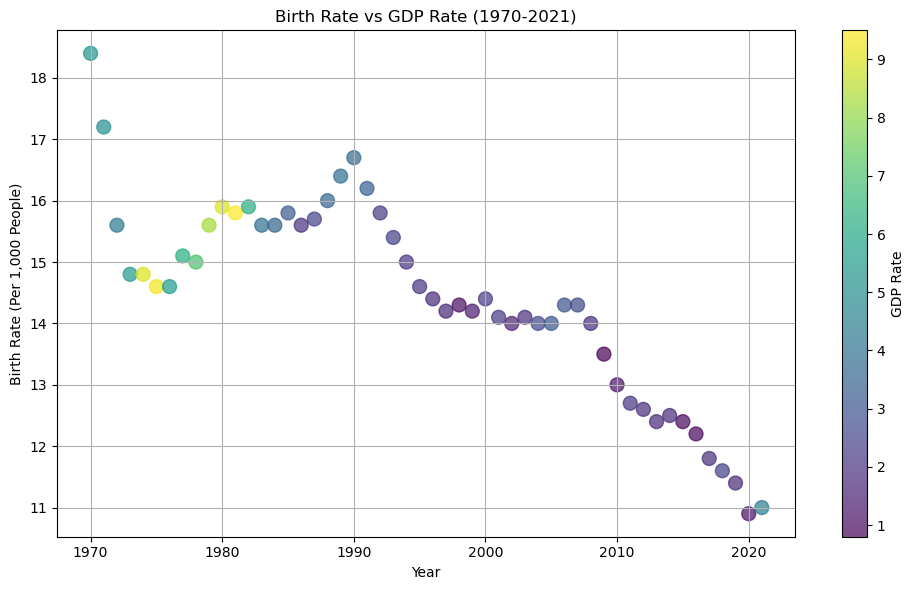

In [242]:
# Data
years = MAIN_DF['Year']
birth_rate = MAIN_DF["Birth Rate (Per 1,000 People)"]
gdp_rate = MAIN_DF["GDP - Gross Domestic Product Rate"]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(years, birth_rate, c=gdp_rate, cmap='viridis', s=100, alpha=0.7)

# Add colorbar
plt.colorbar(label='GDP Rate')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Birth Rate (Per 1,000 People)')
plt.title('Birth Rate vs GDP Rate (1970-2021)')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

### ALL US INFLATION DATA AGAINST BIRTH RATE

In [243]:
MAIN_DF.columns

Index(['Year', 'Birth Rate (Per 1,000 People)',
       'GDP - Gross Domestic Product Rate',
       'PPI - Producer Price Inflation Rate',
       'CCPI - Core Consumer Price Inflation Rate',
       'FCPI - Food Consumer Price Inflation Rate',
       'ECPI - Energy Consumer Price Inflation Rate',
       'HCPI - Headline Consumer Price Inflation Rate'],
      dtype='object')

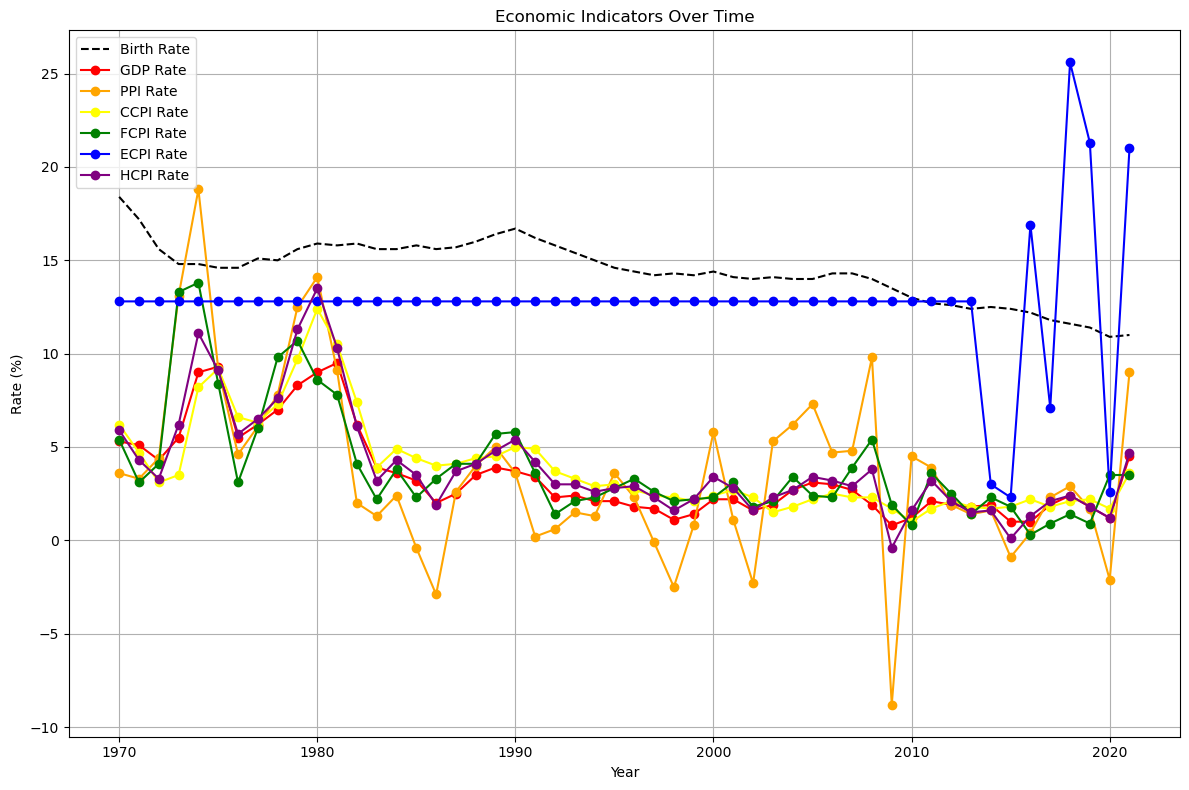

In [244]:
# Data
years = MAIN_DF['Year']
birth_rate = MAIN_DF["Birth Rate (Per 1,000 People)"]
gdp_rate = MAIN_DF["GDP - Gross Domestic Product Rate"]
ppi_rate = MAIN_DF["PPI - Producer Price Inflation Rate"]
ccpi_rate = MAIN_DF["CCPI - Core Consumer Price Inflation Rate"]
fcpi_rate = MAIN_DF["FCPI - Food Consumer Price Inflation Rate"]
ecpi_rate = MAIN_DF["ECPI - Energy Consumer Price Inflation Rate"]  # Plotted the mean (12.8) for the years 1970-2014 to fill in the missing data, for the sake of the visual
hcpi_rate = MAIN_DF["HCPI - Headline Consumer Price Inflation Rate"]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(years, birth_rate, linestyle = '--', label='Birth Rate', color = 'black')
plt.plot(years, gdp_rate, marker='o', label='GDP Rate', color = 'red')
plt.plot(years, ppi_rate, marker='o', label='PPI Rate', color = 'orange')
plt.plot(years, ccpi_rate, marker='o', label='CCPI Rate', color = 'yellow')
plt.plot(years, fcpi_rate, marker='o', label='FCPI Rate', color = 'green')
plt.plot(years, ecpi_rate, marker='o', label='ECPI Rate', color = 'blue')  # Assuming constant
plt.plot(years, hcpi_rate, marker='o', label='HCPI Rate', color = 'purple')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.title('Economic Indicators Over Time')
plt.legend()

# Adding grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


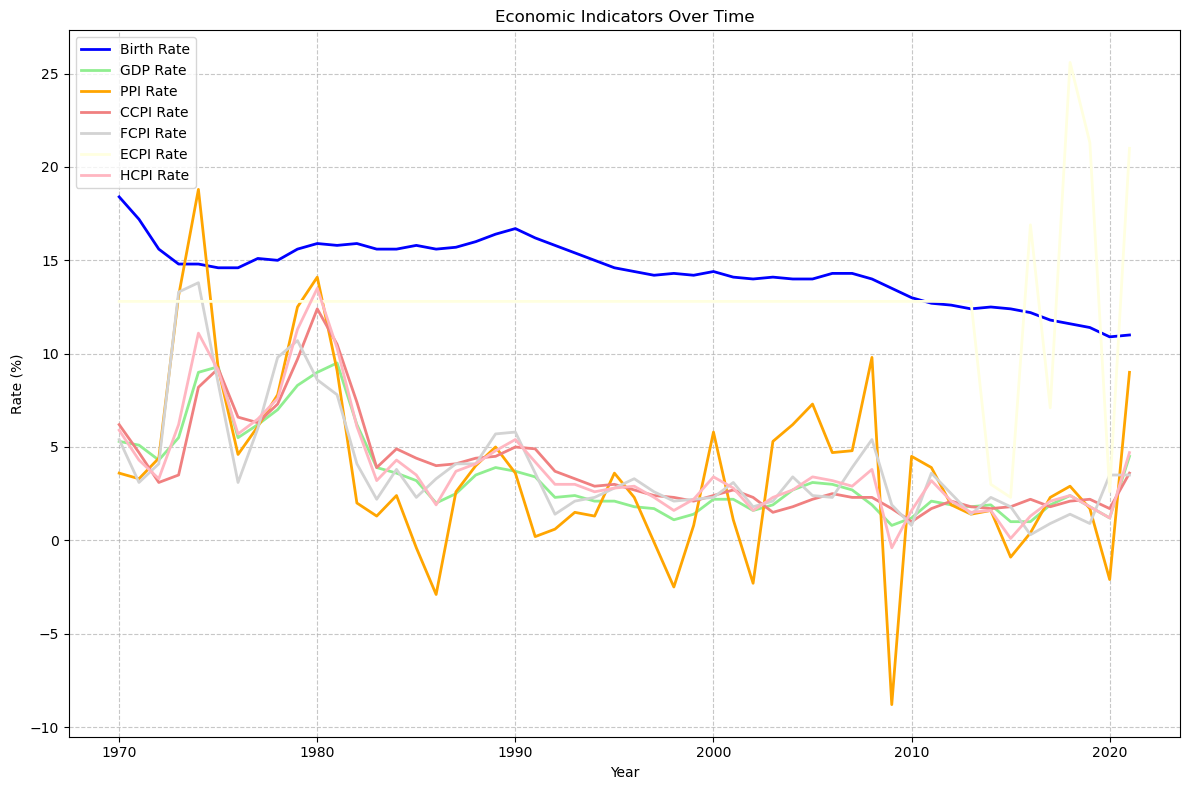

In [245]:
# Plotting
plt.figure(figsize=(12, 8))

# Plotting birth rate with a line plot
plt.plot(years, birth_rate, color='blue', label='Birth Rate', linewidth=2)

# Plotting other indicators with area plots
plt.plot(years, gdp_rate, color='lightgreen', linewidth=2, label='GDP Rate')
plt.plot(years, ppi_rate, color='orange', linewidth=2, label='PPI Rate')
plt.plot(years, ccpi_rate, color='lightcoral', linewidth=2, label='CCPI Rate')
plt.plot(years, fcpi_rate, color='lightgrey', linewidth=2, label='FCPI Rate')
plt.plot(years, ecpi_rate, color='lightyellow', linewidth=2, label='ECPI Rate')
plt.plot(years, hcpi_rate, color='lightpink', linewidth=2, label='HCPI Rate')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.title('Economic Indicators Over Time')

# Adding legend and adjusting its position
plt.legend(loc='upper left')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

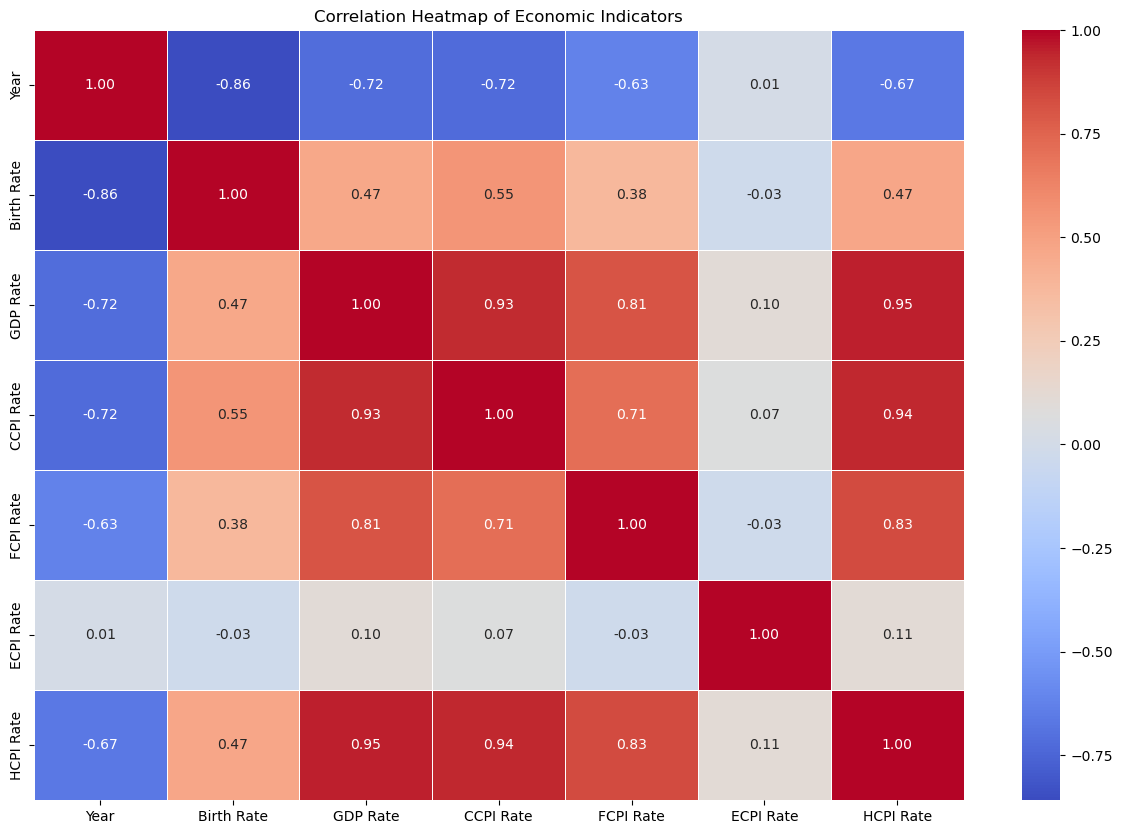

In [246]:
data = {
    'Year': years,
    'Birth Rate': birth_rate,
    'GDP Rate': gdp_rate,
    #'PPI Rate': ppi_rate,
    'CCPI Rate': ccpi_rate,
    'FCPI Rate': fcpi_rate,
    'ECPI Rate': ecpi_rate,
    'HCPI Rate': hcpi_rate
}

# Creating DataFrame
df = pd.DataFrame(data)

# Calculating correlation matrix
correlation_matrix = df.corr()

# Plotting heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()